
# Project: Investigate a Dataset - [No show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project we will be analyzing data of 100k medical appointments in Brazil and we will be focused on finding trends among the patients who did not showed up and how they differed from the patinets who did show up.


### Question(s) for Analysis

1. Which of the patient's characteristics affects showing up for the appointment?
2. Are the patients who don't have scholarships are the most not to show up?
3. Is the neighborhood of the hospital or not receiving sms affect the result?
4. Is the day of the week or the difference between scheduled and appointment day affect the number of patients showing up? 

In [1]:
#import statements for all of the packages that i plan to use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [2]:
#load the data csv file and print few rows 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#check the no. of rows and columns 
df.shape

(110527, 14)

In [4]:
#this return descriptive statistics of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the **summary statistics** of my data, I noticed that from the age column the min is -1 and max is 115 that is unrealistic data should be fixed, *and* that 75% of the patients doesn't have hipertension or diabetes or handcap or alcoholism, *also* 75% of the patients are not entrolled in Brasilian welfare program(scholarship), *finally* the average of the patient who received sms is 32%.

In [5]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

From the **data types** of the columns, I noticed that I need to change ScheduledDay and AppointmentDay columns data type from object(string) to datetime, but first I want to extract only the date (Year-month-day) from it because i will need later to get the difference in time between them, also need to replace No-show columns (yes and no) with (1 and 0) and then change data type from (str) to (int) to be easy work with. 

In [6]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#return number of null values in each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# check for duplicate rows in the data
df.duplicated().sum()

0

In [9]:
#return data columns labels
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
# this returns the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
#check unique values in Handcap column
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [12]:
#check unique values in Age column
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

 **First** thing I will drop the columns that I don't need, then change the columns name to make it easy to use.

And It seems that there is no missing data or duplicate rows to drop, I also checked for data accuracy I found that only age in Age column need to be fixed so I will filter the data in age column to be between 1 and 100 years old.

### Issues 
1. Drop Unwanted Columns
2. Change Columns Names
3. Extract (year-month-day) From ScheduledDay and ApppointmentDay columns
4. Change ScheduledDay and AppointmentDay columns data type to datetime
5. Filter age column
6. Replace No-show column (yes and no) with (1 and 0)
7. Change No-show column data type to intger


### Data Cleaning


1. Drop Unwanted Columns
2. Change Columns Names
3. Extract (year-month-day) From ScheduledDay and ApppointmentDay columns

In [13]:
#i used function to first drop unwanted columns
#second to make columns labels lower case and replace "-" with "_"
#third extract (year-month-day) From ScheduledDay and ApppointmentDay columns
#i called the function
#finally display first few rows of dataframe to confirm changes 

def new_columns():
    df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
    
    df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
    
    changed_columns = ['scheduledday', 'appointmentday']
    for c in changed_columns :
        df[c] = df[c].apply(lambda x: x.split("T")[0])
    
    return new_columns
new_columns()
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


4. Change ScheduledDay and AppointmentDay columns data type to datetime

In [14]:
#use function to change data type to datetime in specific columns
#then called function
#then confirm change by dtypes 
def new_datatype():
    columns = ["scheduledday", "appointmentday"]
    for c in columns:
        df[c] = pd.to_datetime(df[c])
    return new_datatype
new_datatype()
  
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

5. Filter age column

In [15]:
#filter to return only ages between 1 and 100
#then confirm change to see the new no. of rows and columns
df = df.query('1 <= age <= 100')
df.shape

(106980, 12)

6. Replace No-show column (yes and no) with (1 and 0)

In [16]:
#replace yes and no with 1 and 0 in no_show column
#confirm change by display few rows
df['no_show'] = df['no_show'].replace("Yes", 1)
df['no_show'] = df['no_show'].replace("No", 0)
df.tail()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0
110526,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,0


7. Change No-show column data type to intger

In [17]:
#change no_show datatype to int
#confirm it with dtypes 
df['no_show'] = df['no_show'].astype(int)
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                    int32
dtype: object

In [18]:
#desceriptive statistics of no_show column after datatype change
df.no_show.describe()

count    106980.000000
mean          0.202627
std           0.401958
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: no_show, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis




### 1. Which of the patient's characteristics affects showing up for the appointment?

In [19]:
#display few rows to start exploring
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


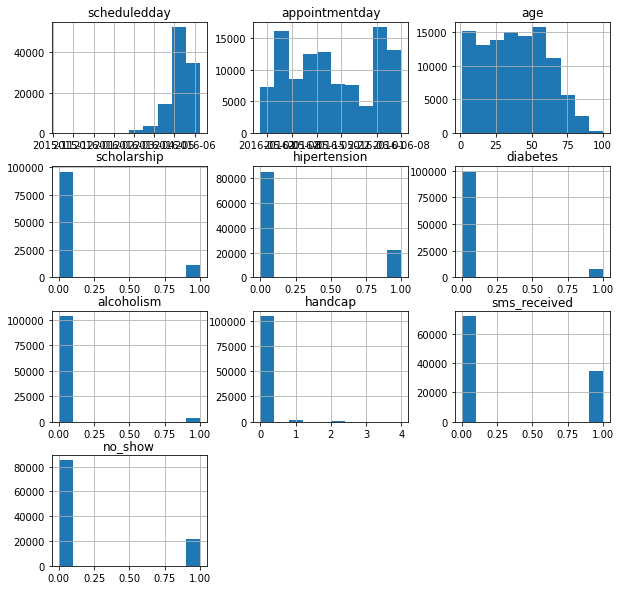

In [20]:
#looking at the histgram of the whole dataframe
df.hist(figsize=(10,10));

First I will create masks to select all rows in the data frame where the patient showed up on the appointment then all rows where the patient didn't showed up to make it easy for analysis

Then I will check value counts and mean for the no_show column for each patient's characteristics to see which of them has an effect and then confirm my analysis with plotting, I will use a combined bar plot and histogram using masks.

In [21]:
#create masks 
show = df.no_show == False
noshow = df.no_show == True

I will create function to plot histogram that i can used it multiple time

In [22]:
#creating a function to plot histogram can be used multiple time
def hist_plot_by(x, xlabel, ylabel , title):
    ''' A function to draw a histgram '''
    ax = plt.subplot(1,1,1)
    ax.hist(x, alpha=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title) 
    
plt.show()

In [23]:
# Find the mean of no_show column of each gender with groupby
df.groupby('gender').no_show.mean()

gender
F    0.203563
M    0.200846
Name: no_show, dtype: float64

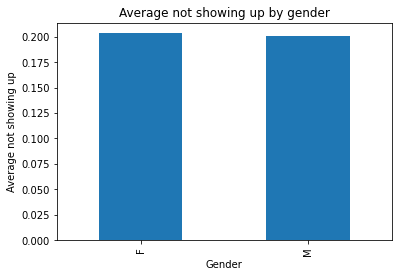

In [24]:
#plotting it with bar chart
df.groupby('gender').no_show.mean().plot(kind='bar')
plt.title('Average not showing up by gender')
plt.xlabel('Gender')
plt.ylabel('Average not showing up');


In [25]:
df.gender[show].count(), df.gender[noshow].count()

(85303, 21677)

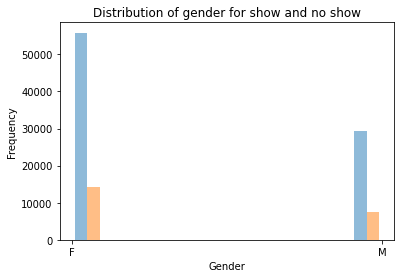

In [26]:
#using hist fuction to plot gender using masks
x= df.gender[show], df.gender[noshow]
hist_plot_by(x, "Gender", "Frequency", "Distribution of gender for show and no show")

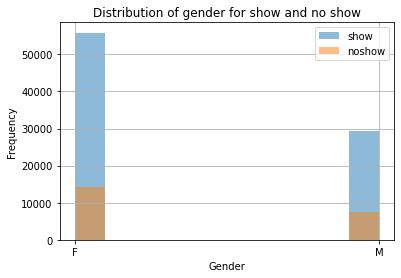

In [27]:
#another way to plot hist without function
df.gender[show].hist(alpha=0.5,label='show')
df.gender[noshow].hist(alpha=0.5,label='noshow');
plt.title('Distribution of gender for show and no show')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend();

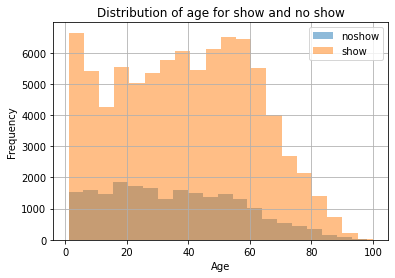

In [28]:
#plot distribution of age using masks
df.age[noshow].hist(alpha=0.5, bins=20, label='noshow')
df.age[show].hist(alpha=0.5, bins=20, label='show')
plt.title('Distribution of age for show and no show')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend();

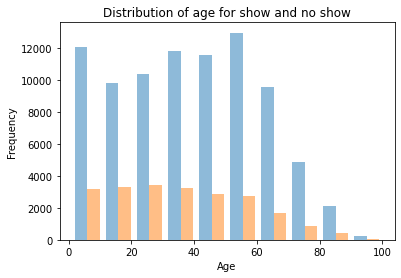

In [29]:
#using function to plot histogram for age using masks
x = df.age[show], df.age[noshow]
hist_plot_by(x, "Age", "Frequency", "Distribution of age for show and no show")

In [30]:
#Find mean no_show column for every unique handcap value with groupby
df.groupby('handcap').no_show.mean()

handcap
0    0.203095
1    0.178203
2    0.202186
3    0.230769
4    0.333333
Name: no_show, dtype: float64

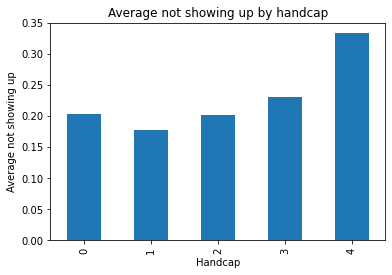

In [31]:
#plotting that mean with bar chart
df.groupby('handcap').no_show.mean().plot(kind= 'bar')
plt.title('Average not showing up by handcap')
plt.xlabel('Handcap')
plt.ylabel('Average not showing up');

In [32]:
#check value counts of each unique value of handcap
df.handcap.value_counts()

0    104744
1      2037
2       183
3        13
4         3
Name: handcap, dtype: int64

In [33]:
#Find count of no show column for diabetes with groupby
df.groupby('diabetes')['no_show'].value_counts()

diabetes  no_show
0         0          78790
          1          20247
1         0           6513
          1           1430
Name: no_show, dtype: int64

In [34]:
#checking mean of diabetes using masks
df.diabetes[noshow].mean() , df.diabetes[show].mean()

(0.06596853808183789, 0.0763513592722413)

In [35]:
#checking mean of no_show column to confim it
df.groupby('diabetes').no_show.mean()

diabetes
0    0.204439
1    0.180033
Name: no_show, dtype: float64

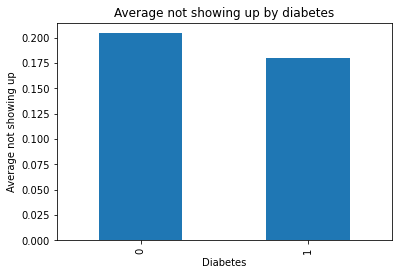

In [36]:
#plotting the mean of no_show column for diabetes with bar
df.groupby('diabetes').no_show.mean().plot(kind='bar');
plt.title('Average not showing up by diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Average not showing up');

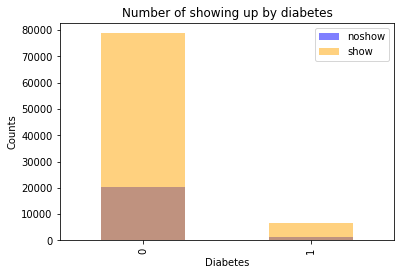

In [37]:
#plot bar for value counts of diabetes using masks
df.diabetes[noshow].value_counts().plot(kind='bar', alpha=0.5, color='blue',label='noshow')
df.diabetes[show].value_counts().plot(kind='bar', alpha=0.5, color='orange',label='show');
plt.title('Number of showing up by diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Counts')
plt.legend();

In [38]:
#checking mean of alcoholism using masks
df.alcoholism[noshow].mean() , df.alcoholism[show].mean()

(0.03123125893804493, 0.03145258666166489)

In [39]:
#counts of no_show values for alcoholism
df.groupby('alcoholism').no_show.value_counts()

alcoholism  no_show
0           0          82620
            1          21000
1           0           2683
            1            677
Name: no_show, dtype: int64

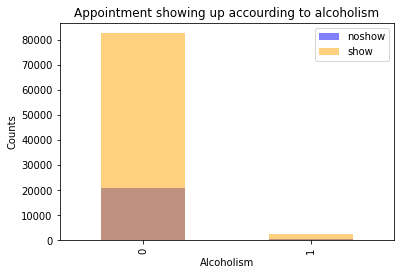

In [40]:
#plot bar for value counts of alcoholism
df.alcoholism[noshow].value_counts().plot(kind='bar', alpha=0.5, color='blue',label='noshow')
df.alcoholism[show].value_counts().plot(kind='bar', alpha=0.5, color='orange',label='show');
plt.title('Appointment showing up accourding to alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Counts')
plt.legend();

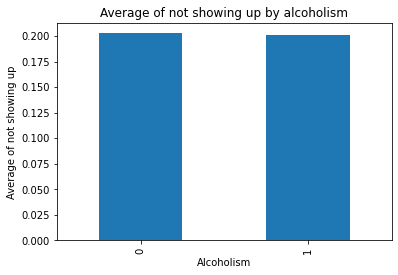

In [41]:
# plot alcoholism, no _show mean bar
df.groupby('alcoholism').no_show.mean().plot(kind="bar")
plt.title('Average of not showing up by alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Average of not showing up');


In [42]:
#mean for hipertension using masks
df.hipertension[noshow].mean(), df.hipertension[show].mean()

(0.17400931863265212, 0.211340750032238)

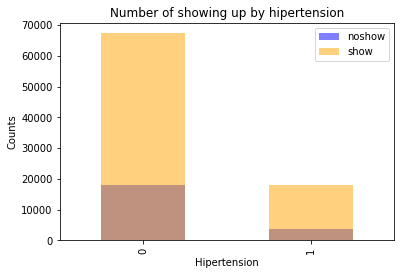

In [43]:
# bar chart for hipertension counts using masks
df.hipertension[noshow].value_counts().plot(kind='bar', alpha=0.5, color='blue',label='noshow')
df.hipertension[show].value_counts().plot(kind='bar', alpha=0.5, color='orange',label='show');
plt.title('Number of showing up by hipertension')
plt.xlabel('Hipertension')
plt.ylabel('Counts')
plt.legend();

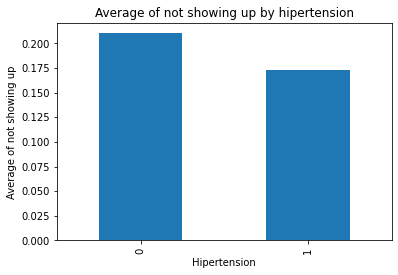

In [44]:
#plot mean of no_show column for alcoholism
df.groupby('hipertension').no_show.mean().plot(kind="bar")
plt.title('Average of not showing up by hipertension')
plt.xlabel('Hipertension')
plt.ylabel('Average of not showing up');

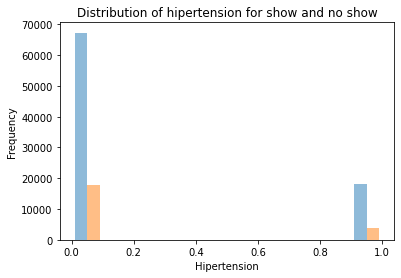

In [45]:
#using function to plot hipertension distribution
x = df.hipertension[show], df.hipertension[noshow]
hist_plot_by(x, "Hipertension", "Frequency", "Distribution of hipertension for show and no show")

From analyzing the different patient's characteristics I found that having hipertension or diabetes or alcoholism, age and gender does not affect showing up at the appointment.
But the higher the number of handcaps the more likely the patient will not show up.

### 2. Are the patients who don't have scholarships are the most not to show up?

In [46]:
#check mean for scholarship using masks
df.scholarship[noshow].mean(), df.scholarship[show].mean()

(0.11860497301287079, 0.09657339132269674)

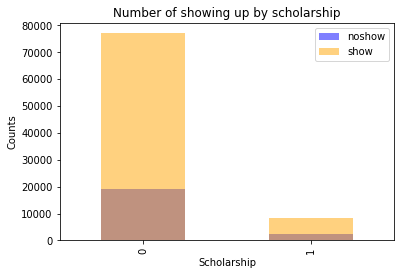

In [47]:
#plot bar for value counts of scholarship using masks
df.scholarship[noshow].value_counts().plot(kind='bar', alpha=0.5, color='blue',label='noshow')
df.scholarship[show].value_counts().plot(kind='bar', alpha=0.5, color='orange',label='show');
plt.title('Number of showing up by scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Counts')
plt.legend();

In [48]:
#the difference in mean 
d = df.scholarship[noshow].mean()- df.scholarship[show].mean()
d

0.02203158169017405

It seems from the mean of the scholarship (which indicates the poorness of the patient) that it has an affect on showing at the appointment (2.2% difference)

### 3. Is the neighborhood of the hospital or not receiving sms affect the result? 

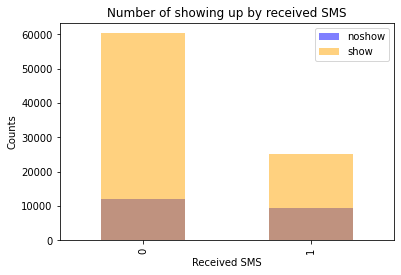

In [49]:
#plot bar for value counts of sms_received using masks
df.sms_received[noshow].value_counts().plot(kind='bar', alpha=0.5, color='blue',label='noshow')
df.sms_received[show].value_counts().plot(kind='bar', alpha=0.5, color='orange',label='show');
plt.title('Number of showing up by received SMS')
plt.xlabel('Received SMS')
plt.ylabel('Counts')
plt.legend();

In [50]:
#check mean for sms_received using masks
df.sms_received[noshow].mean(), df.sms_received[show].mean()

(0.4413894911657517, 0.29326049494156126)

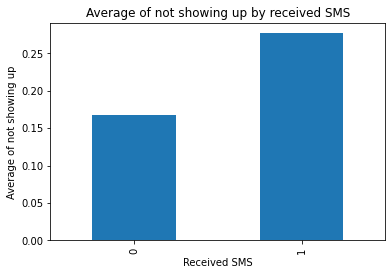

In [51]:
#bar chart for the mean of no_show column for sms_received
df.groupby('sms_received').no_show.mean().plot(kind='bar')
plt.title('Average of not showing up by received SMS')
plt.xlabel('Received SMS')
plt.ylabel('Average of not showing up');

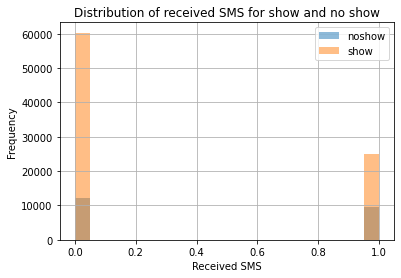

In [52]:
#plot sms received distribution using masks 
df.sms_received[noshow].hist(alpha=0.5, bins=20, label='noshow')
df.sms_received[show].hist(alpha=0.5, bins=20, label='show')
plt.title('Distribution of received SMS for show and no show')
plt.xlabel('Received SMS')
plt.ylabel('Frequency')
plt.legend();

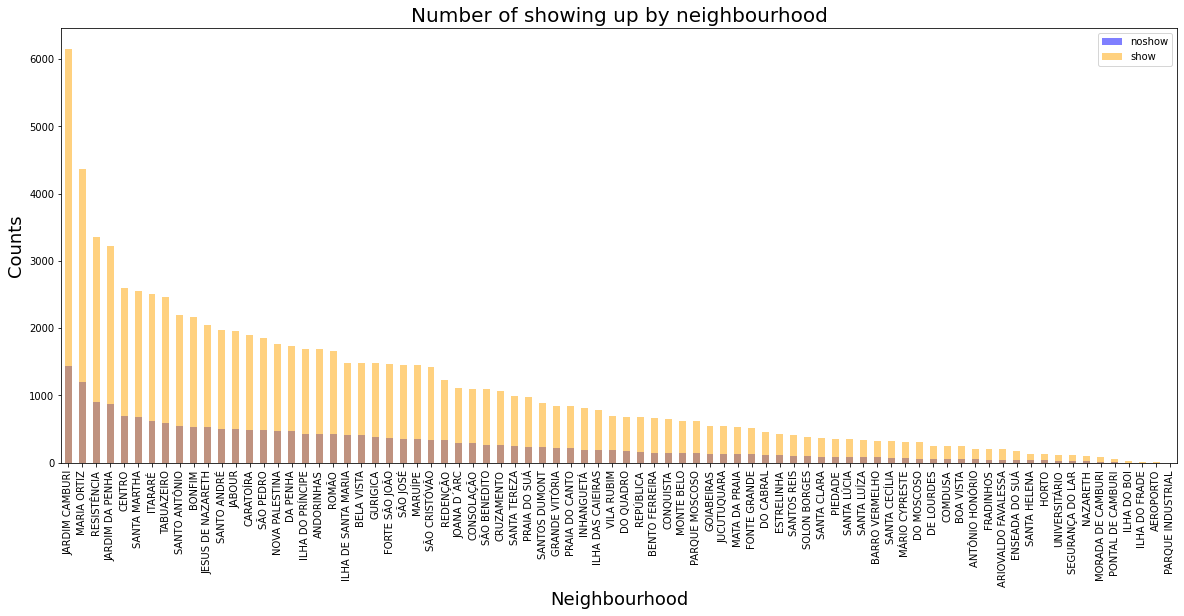

In [53]:
#plot bar for value counts of neighbourhood using masks
df.neighbourhood[noshow].value_counts().plot(kind='bar', alpha=0.5, color='blue',figsize=(20,8) , label='noshow')
df.neighbourhood[show].value_counts().plot(kind='bar', alpha=0.5, color='orange',label='show',figsize=(20,8));
plt.title('Number of showing up by neighbourhood', size=20)
plt.xlabel('Neighbourhood', size=18)
plt.ylabel('Counts', size=18)
plt.legend();

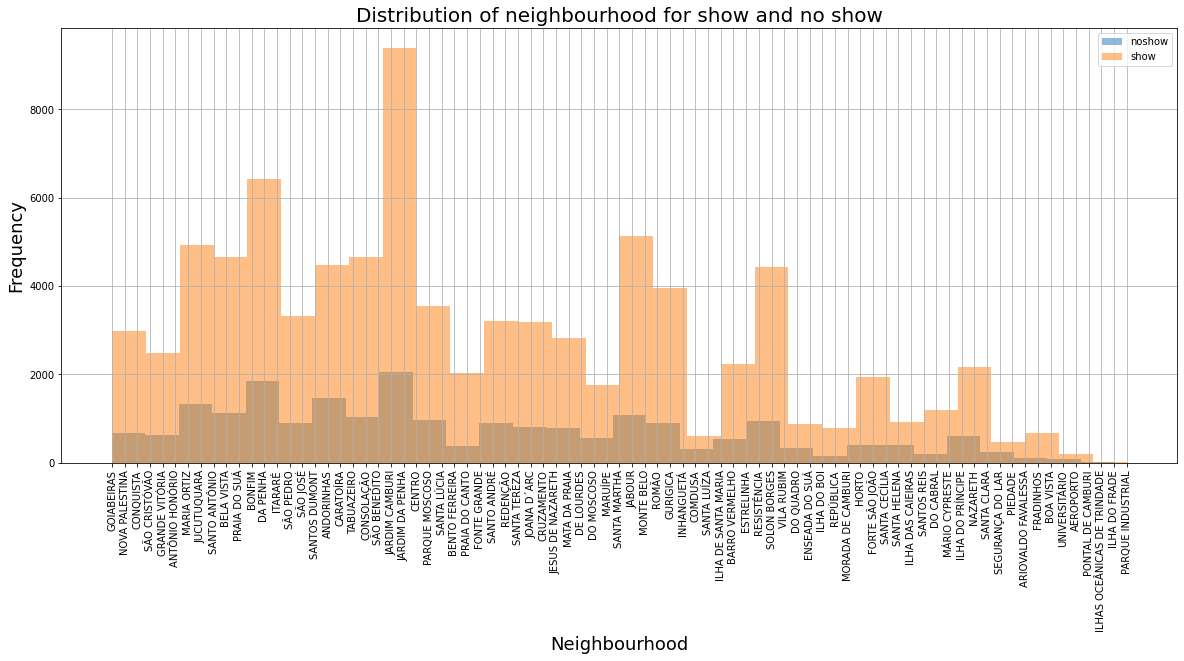

In [54]:
#plot distribution of neighbourhood using masks
df.neighbourhood[noshow].hist(alpha=0.5, bins=30, label='noshow', figsize=(20,8))
df.neighbourhood[show].hist(alpha=0.5, bins=30, label='show',figsize=(20,8))
plt.xticks(rotation=90)
plt.title('Distribution of neighbourhood for show and no show', size=20)
plt.xlabel('Neighbourhood', size=18)
plt.ylabel('Frequency', size=18)
plt.legend();

Sending SMS has a negative relationship with attending  because the average of patients who received SMS and didn't come was more than those who come

The neighbourhood where the hospitals are, affects the attending appointments 

### 4. Is the day of the week or the difference between scheduled and appointment day affect the number of patients showing up?

First i will extract the day from the appointment column and create a new column (day), second i will create a new column from the difference time between scheduled and appointment day

In [55]:
# create day column
df['day'] = df['appointmentday'].dt.day_name()
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday


In [56]:
#create difference time column
#first i calculated the difference
#then extract only the int from the str
#then convert column to int
df['difference_time'] = df['appointmentday'] - df['scheduledday']
df['difference_time'] = df['difference_time'].astype(str)
df['difference_time'] = df['difference_time'].str.extract("(\d+)").astype(int)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day,difference_time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,0


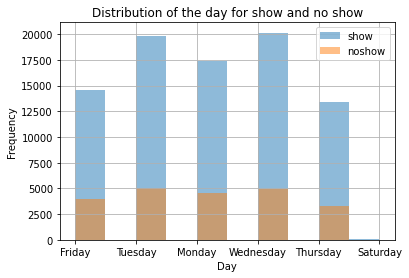

In [57]:
#plot distribution of day 
df.day[show].hist(alpha=0.5,label='show')
df.day[noshow].hist(alpha=0.5,label='noshow')
plt.title('Distribution of the day for show and no show')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.legend();

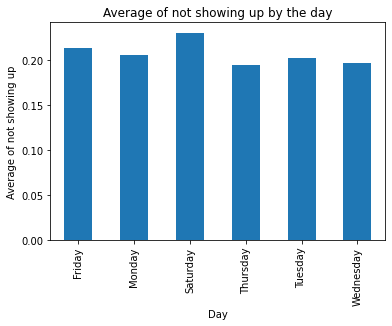

In [58]:
#plot bar for the mean no_show column for day 
df.groupby('day').no_show.mean().plot(kind='bar')
plt.title('Average of not showing up by the day')
plt.xlabel('Day')
plt.ylabel('Average of not showing up');

In [59]:
#counts for every day appointments
df.day.value_counts()

Wednesday    25090
Tuesday      24830
Monday       21901
Friday       18464
Thursday     16656
Saturday        39
Name: day, dtype: int64

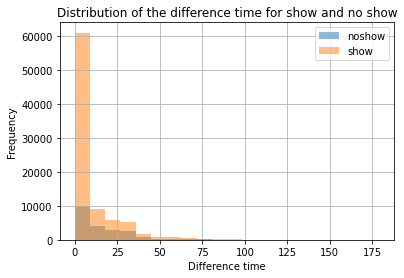

In [60]:
#plot hist for difference time column
df.difference_time[noshow].hist(alpha=0.5, bins=20, label='noshow')
df.difference_time[show].hist(alpha=0.5, bins=20, label='show')
plt.title('Distribution of the difference time for show and no show')
plt.xlabel('Difference time')
plt.ylabel('Frequency')
plt.legend();

In [61]:
#descriptive statistics for difference time column
df.difference_time[noshow].describe()

count    21677.000000
mean        15.790377
std         16.614977
min          0.000000
25%          4.000000
50%         11.000000
75%         23.000000
max        179.000000
Name: difference_time, dtype: float64

For 75% of the patients who did not show up the difference time between scheduled and appointment day was more than 23 days, and 50% of them had more than 11 days so the more time between scheduled and appointment day, the more the patient will not show up, and it also depends on the day of the week because there are slightly different between the days

<a id='conclusions'></a>
## Conclusions

> We can predict from the patient's characteristics that having diseses like hipertentsion or diabetes or having alcaholic problems doesn't affect showing up.

> Only handcap people the more hadcap they have the more they likely will not show up.

> Also showing up doesn't depend on age or gender

> From the average of the patient being in the Brazilian enrolled program (scholarship) that the patient who has scholarship 2.2% more than those who hasn't, will not show up, but ofcourse, additional research can be done to confirm that the poorest of the patient caused that not another reason.

> Sending SMS seems to be useless and additional information could be helpful to know the time of sending 

> The neighbourhood where the hospitals are, also affects the attendance, so more research can be done to know the reasons.

> And the most important factor is the time difference between the scheduled and appointments day, with a long time difference most likely patient will not show up, So I suggest the appointment should not be made more than a week from the scheduled day, and max of 2 week.

> Also, the missing appointments differ from day to day of the week, and with the limitation of our data we can't know the reasons.